# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [42]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [44]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [45]:
# Rename all the columns to lower case
df.columns = df.columns.str.strip().str.lower()

df.columns


Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [46]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

Change the index to `'linename'`: 

In [47]:
# Change the index to 'linename'
df = df.set_index('linename')
print(df.head())

           c/a  unit       scp station division        date      time  \
linename                                                                
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  00:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  04:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  08:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  12:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  16:00:00   

             desc  entries    exits  
linename                             
NQR456W   REGULAR  6736067  2283184  
NQR456W   REGULAR  6736087  2283188  
NQR456W   REGULAR  6736105  2283229  
NQR456W   REGULAR  6736180  2283314  
NQR456W   REGULAR  6736349  2283384  


Reset the index: 

In [48]:
# Reset the index
df = df.reset_index()

print(df.head())

  linename   c/a  unit       scp station division        date      time  \
0  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  00:00:00   
1  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  04:00:00   
2  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  08:00:00   
3  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  12:00:00   
4  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  16:00:00   

      desc  entries    exits  
0  REGULAR  6736067  2283184  
1  REGULAR  6736087  2283188  
2  REGULAR  6736105  2283229  
3  REGULAR  6736180  2283314  
4  REGULAR  6736349  2283384  


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [49]:
# Add a new 'num_lines' column
df['Num_Lines'] = df['linename'].apply(len)

df = df.sort_values(by='Num_Lines', ascending=False)

print(df.head())

            linename   c/a  unit       scp         station division  \
132292  1237ACENQRSW  R151  R033  00-00-00  TIMES SQ-42 ST      IRT   
2686    ACENQRS1237W  A021  R032  01-00-01  TIMES SQ-42 ST      BMT   
2673    ACENQRS1237W  A021  R032  01-00-01  TIMES SQ-42 ST      BMT   
2674    ACENQRS1237W  A021  R032  01-00-01  TIMES SQ-42 ST      BMT   
2675    ACENQRS1237W  A021  R032  01-00-01  TIMES SQ-42 ST      BMT   

              date      time     desc  entries    exits  Num_Lines  
132292  08/30/2018  00:00:00  REGULAR  1417952  3267016         12  
2686    08/29/2018  16:00:00  REGULAR  2836145  3311412         12  
2673    08/27/2018  16:00:00  REGULAR  2830710  3305818         12  
2674    08/27/2018  20:00:00  REGULAR  2832048  3306310         12  
2675    08/28/2018  00:00:00  REGULAR  2832325  3306433         12  


Write a function to clean column names: 

In [50]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

In [51]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip().lower().replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '')
    return cleaned

df.columns = [clean(col) for col in df.columns]

In [52]:
# Use the above function to clean the column names
print(df.columns)

Index(['linename', 'c_a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')


In [53]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c_a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [54]:
# Convert the data type of the 'date' column to a date

df['date'] = pd.to_datetime(df['date'])


# Add a new column 'day_of_week' that represents the day of the week

df['day_of_week'] = df['date'].dt.day_name()

print(df)

            linename    c_a  unit       scp         station division  \
132292  1237ACENQRSW   R151  R033  00-00-00  TIMES SQ-42 ST      IRT   
2686    ACENQRS1237W   A021  R032  01-00-01  TIMES SQ-42 ST      BMT   
2673    ACENQRS1237W   A021  R032  01-00-01  TIMES SQ-42 ST      BMT   
2674    ACENQRS1237W   A021  R032  01-00-01  TIMES SQ-42 ST      BMT   
2675    ACENQRS1237W   A021  R032  01-00-01  TIMES SQ-42 ST      BMT   
...              ...    ...   ...       ...             ...      ...   
112565             1  PTH04  R551  00-04-05    GROVE STREET      PTH   
112564             1  PTH04  R551  00-04-05    GROVE STREET      PTH   
112563             1  PTH04  R551  00-04-05    GROVE STREET      PTH   
112562             1  PTH04  R551  00-04-05    GROVE STREET      PTH   
197624             R  TRAM2  R469  00-05-01   RIT-ROOSEVELT      RIT   

             date      time     desc  entries    exits  num_lines day_of_week  
132292 2018-08-30  00:00:00  REGULAR  1417952  3267016 

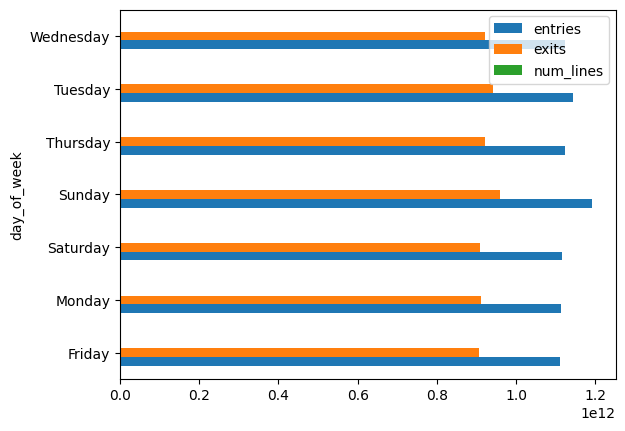

In [55]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [56]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
print(grouped.head())

  day_of_week        entries         exits  num_lines
0      Friday  1110224700078  906799065337      75573
1      Monday  1114237052454  911938153513      76110
2    Saturday  1115661545514  909142081474      74725
3      Sunday  1192306179082  959223750461      75306
4    Thursday  1122723988662  920691927110      76607


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [57]:
# Use this dictionary to create a new column 
day_name_to_int = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

df['day_of_week_int'] = df['day_of_week'].map(day_name_to_int)

df['is_weekend'] = df['day_of_week_int'].map(weekend_map)

print(df)

            linename    c_a  unit       scp         station division  \
132292  1237ACENQRSW   R151  R033  00-00-00  TIMES SQ-42 ST      IRT   
2686    ACENQRS1237W   A021  R032  01-00-01  TIMES SQ-42 ST      BMT   
2673    ACENQRS1237W   A021  R032  01-00-01  TIMES SQ-42 ST      BMT   
2674    ACENQRS1237W   A021  R032  01-00-01  TIMES SQ-42 ST      BMT   
2675    ACENQRS1237W   A021  R032  01-00-01  TIMES SQ-42 ST      BMT   
...              ...    ...   ...       ...             ...      ...   
112565             1  PTH04  R551  00-04-05    GROVE STREET      PTH   
112564             1  PTH04  R551  00-04-05    GROVE STREET      PTH   
112563             1  PTH04  R551  00-04-05    GROVE STREET      PTH   
112562             1  PTH04  R551  00-04-05    GROVE STREET      PTH   
197624             R  TRAM2  R469  00-05-01   RIT-ROOSEVELT      RIT   

             date      time     desc  entries    exits  num_lines day_of_week  \
132292 2018-08-30  00:00:00  REGULAR  1417952  3267016

IndexError: index 0 is out of bounds for axis 0 with size 0

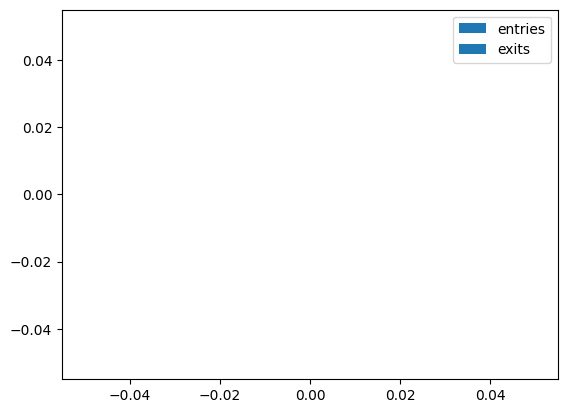

In [58]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [67]:
# # Remove the 'c/a' and 'scp' columns
# Check if the columns exist before dropping them
columns_to_drop = ['c/a', 'scp']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Remove the 'c/a' and 'scp' columns if they exist
if existing_columns_to_drop:
    df = df.drop(columns=existing_columns_to_drop)

# Print the first two rows of the DataFrame
print(df.head(2))

   linename  unit  station  division        date      time     desc  entries  \
0         1     5        9        11  2025-01-19  13:00:54  REGULAR      100   
1         2     6       10        12  2025-01-20  14:00:54  REGULAR      200   

   exits  Num_Lines  
0    150          1  
1    250          2  


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 
#1. Incorrect data mapping - if the 'day_of_week' column was incorrectly mapped to weekend/weekday values.
#2. Inconsistent data - if tge dataset includes inconsistent or missing values for certain days, it could skew the results. 
#3. Visual Representation - The way is presented visually can also mislead. For example, using different scales for weekdats and weekends can distort the perception of the data. 

## Summary

You practiced your data cleanup skills using Pandas.